In [1]:
#%reload_ext autoreload
%load_ext autoreload

%autoreload 2


In [1]:
!pip show dill 

Name: dill
Version: 0.3.2
Summary: serialize all of python
Home-page: https://pypi.org/project/dill
Author: Mike McKerns
Author-email: None
License: 3-clause BSD
Location: /Users/Thugg/opt/miniconda3/envs/AIS/lib/python3.7/site-packages
Requires: 
Required-by: 


In [158]:
dill.dump_session('feat_imp.db')
#dill.load_session('feat_imp.db')

<h1>Imports <h1>

In [1]:
import sys
import os
print(sys.executable) 
print(sys.version) 
print(sys.version_info)
print(os.getcwd())
print(sys.path)
#sys.path.pop()
sys.path.append("/Users/Thugg/opt/miniconda3/envs/AIS/lib/python3.7/site-packages")

/Library/Frameworks/Python.framework/Versions/3.7/bin/python3
3.7.2 (v3.7.2:9a3ffc0492, Dec 24 2018, 02:44:43) 
[Clang 6.0 (clang-600.0.57)]
sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)
/Users/Thugg/Documents/UM/Summer_2020/Jupyter
['/Users/Thugg/Documents/UM/Summer_2020/Jupyter', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/Thugg/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/Thugg/.ipython']


In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.base import clone
from zlib import crc32
from drop_collinear import drop_collinear
from run_rf import run_rf
from stratx import *
from stratx.featimp import *
from functools import reduce

<h1>Read in CSV's and Drop Collinear Columns <h1>

In [53]:
#Read in CSV from Clean_CSV.pynb
csv_WCT = pd.read_csv("WCT_Clean.csv")
csv_RBT = pd.read_csv("RBT_Clean.csv")

In [54]:
X_wct = csv_WCT.drop('weightedPWCT', axis=1)
y_wct = csv_WCT['weightedPWCT']
X_rbt = csv_RBT.drop('weightedPRBT',axis=1)
y_rbt = csv_RBT['weightedPRBT']

In [55]:
#Drop Collinear Columns
X_wct_collinear = drop_collinear(X_wct,0.7)
X_rbt_collinear = drop_collinear(X_rbt,0.7)

<h5>Split data and Train model <h5>

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_wct_collinear,
                                                    y_wct,
                                                   test_size = 0.2,
                                                   random_state = 12)

<h1>Feature Importance for WCT <h1>

In [57]:
#Grab best Parameters from Tune_HyperParameters.pynb

In [75]:
best_grid = RandomForestRegressor(bootstrap= False,
                                  max_depth= 70,
                                  max_features= 8,
                                  min_samples_leaf= 1,
                                  min_samples_split= 10,
                                  n_estimators= 600)
best_grid.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=70, max_features=8,
                      min_samples_split=10, n_estimators=600)

<h2>Stratx Feature Importances <h2>

In [132]:
wct_imp = importances(X = X_wct_collinear,
                      y = y_wct, 
                      n_trees = 100, 
                      n_trials = 50,
                      min_samples_leaf = 15,
                      n_jobs = -1)


PARAMETERS:
	n=|X|                93
	n_trials             50
	min_samples_leaf     15
	cat_min_samples_leaf 5
	min_slopes_per_x     5
	bootstrap            True
	n_trees              100
Impact importance time 6s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact

In [134]:
wct_imp.sort_values(["Importance"],ascending = False)

,Importance,Importance sigma,Impact,Impact sigma
Feature,,,,
Topographic Diversity,0.116419,0.062294,0.119188,0.064101
Human Modification,0.095727,0.045337,0.093875,0.047489
Mean_EVI,0.092565,0.039341,0.093447,0.039888
Percent_NonTree_Vegetation,0.086383,0.043144,0.087249,0.043488
Abs_Water_Change,0.084054,0.043540,0.085431,0.044226
Occurrence,0.077871,0.050571,0.076715,0.048968
Lithology,0.074390,0.026853,0.074097,0.025858
Physiography,0.068322,0.032855,0.068720,0.033728
Mean_GPP,0.067010,0.026201,0.066864,0.024926


<h2>Plot Feature Importances / Impacts <h2>

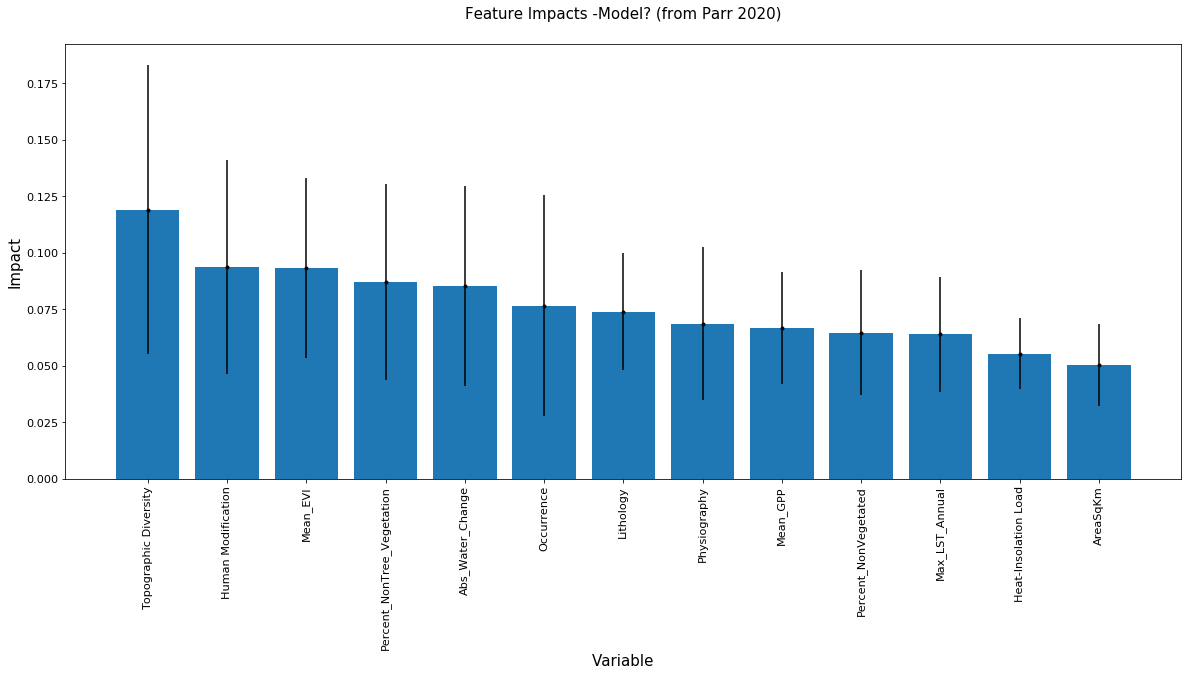

In [135]:
wct_imp = wct_imp.sort_values("Impact",ascending = False)#.reset_index(drop=False)
xs = wct_imp.index
impact = wct_imp['Impact']
variable = wct_imp.index
wct_imp['feature'] = variable

plt.bar(xs, impact, orientation = 'vertical')
plt.errorbar(xs, impact, c = 'black',yerr = wct_imp['Impact sigma'], fmt = '.')

plt.xticks(xs, variable, rotation = 'vertical')

plt.ylabel("Impact"); plt.xlabel("Variable"); plt.title("Feature Impacts -Model? (from Parr 2020)")
plt.show()

<h1>Drop Columns / Permutation Feature Importance <h1>

In [136]:
#Do not run-- drop column analysis
drop_col_imp = drop_col(best_grid, X_train, y_train, random_state = 10)

In [137]:
#Do not run- permutation importance
perm = permutation_importance(best_grid, X_train, y_train, n_repeats = 30, random_state = 10)

<h2>Put All into DataFrame <h2>

In [139]:
par_imp = wct_imp[['feature','Importance','Importance sigma']] \
            .rename(columns = dict(zip(par_imp.columns,['feature','feature_importance','importance_sd']))) \
            .sort_values("Importance",ascending = False)
perm_imp_df = pd.DataFrame({"feature": X_train.columns,
                           "feature_importance": perm.importances_mean,
                           "feat_imp_sd": perm.importances_std}) \
                        .sort_values('feature_importance',ascending = False).reset_index(drop=True)
drop_imp = drop_col_imp.sort_values('feature_importance',ascending = False).reset_index(drop=True)

dfs = [par_imp,perm_imp_df,drop_imp]

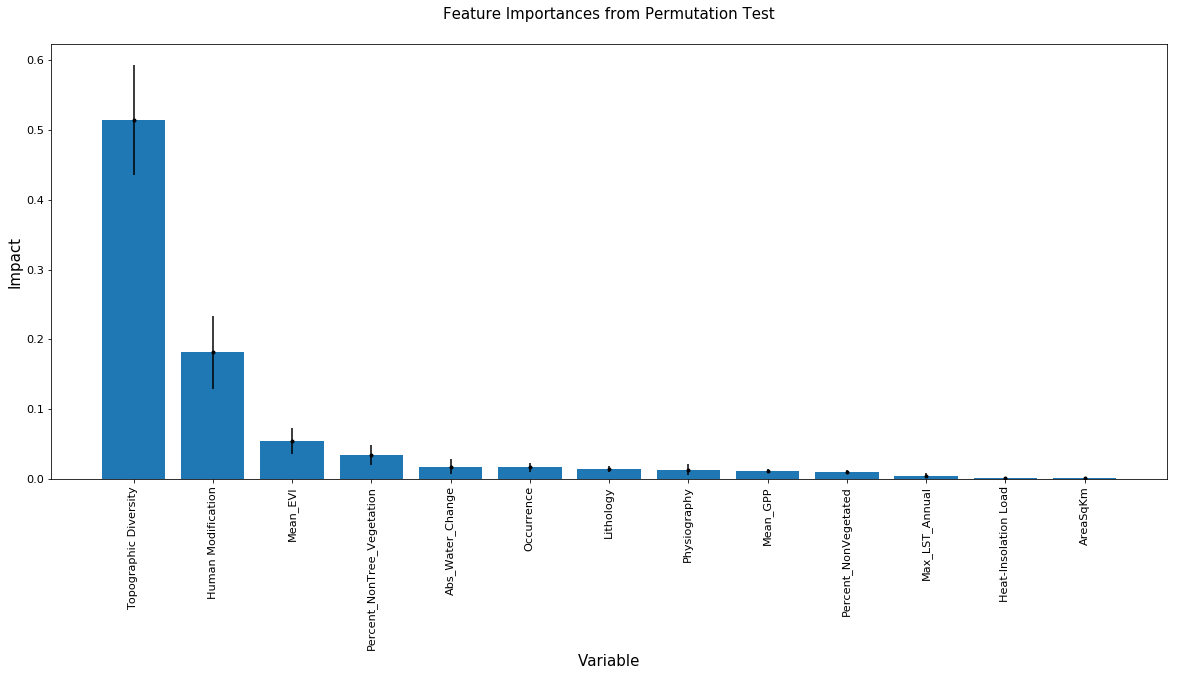

In [142]:
xs = perm_imp_df.index
impact = perm_imp_df['feature_importance']
perm_imp_df['feature'] = variable

plt.bar(xs, impact, orientation = 'vertical')
plt.errorbar(xs, impact, c = 'black',yerr = perm_imp_df['feat_imp_sd'], fmt = '.')

plt.xticks(xs, variable, rotation = 'vertical')

plt.ylabel("Impact"); plt.xlabel("Variable"); plt.title("Feature Importances from Permutation Test")
plt.show()

In [143]:
#Append rank to each data frame
def give_rank(df):
    df['rank'] = np.arange(1,len(df)+1)
    return df


par_imp = give_rank(par_imp)
perm_imp_df = give_rank(perm_imp_df)
drop_imp = give_rank(drop_imp)

In [144]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='feature'), dfs)
rename = ['Feature','Parr_Importance','Parr_Importance_SD',
          'Parr_Rank','Perm_Importance', "Perm_Importance_SD",
          'Perm_Rank','DropColumns_Importance','Drop_Rank']
df_final = df_final.rename(columns = dict(zip(df_final.columns,rename))) \
                    .sort_values("Perm_Importance",ascending = False) \
                    .reset_index(drop=True)

In [146]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

<h1>Importances plot without error bars <h1>

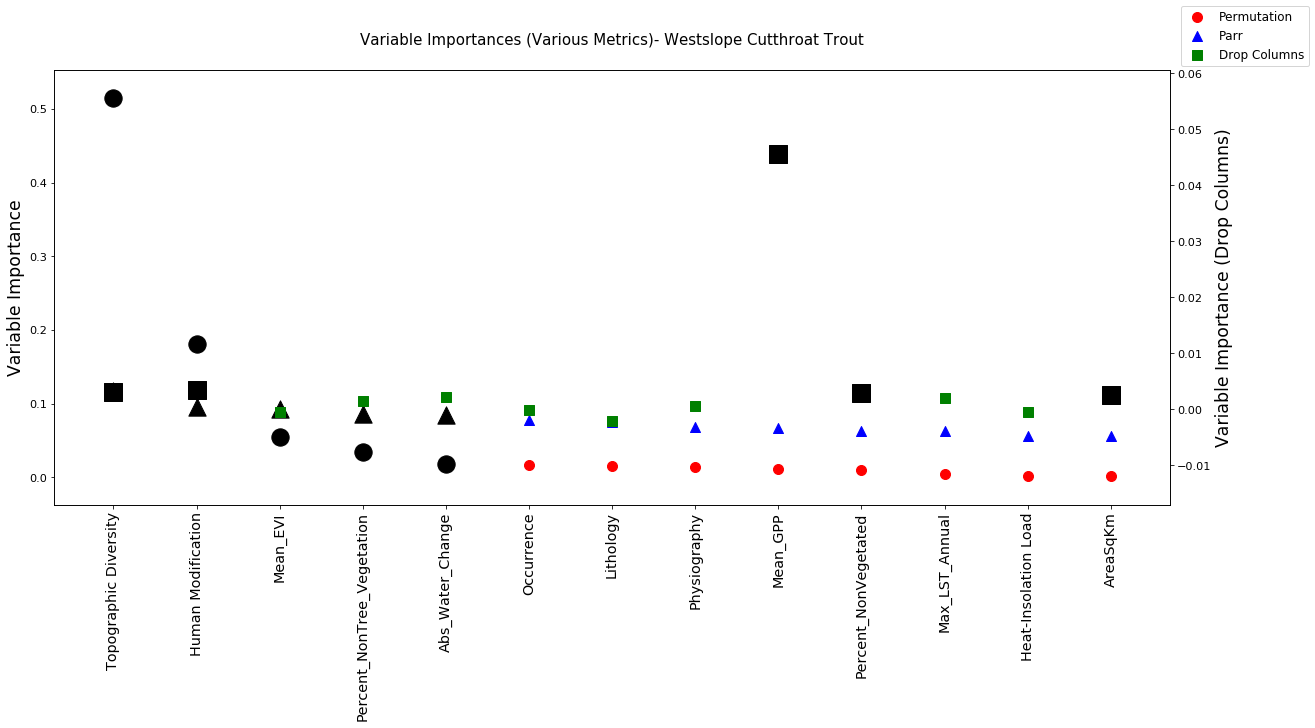

In [147]:
top_parr = df_final[['Parr_Importance','Feature']]\
                .sort_values('Parr_Importance', ascending = False)[:5]
top_perm = df_final[['Perm_Importance','Feature']]\
                .sort_values('Perm_Importance', ascending = False)[:5]
top_drop = df_final[['DropColumns_Importance','Feature']]\
                .sort_values('DropColumns_Importance', ascending = False)[:5]

fig,ax1 = plt.subplots()




#Set Axis Labels and Ticks
ax1.set_xticks(df_final.index, minor=False)
ax1.set_xticklabels(df_final['Feature'],rotation = 'vertical',fontsize = 'x-large')
ax1.set_ylabel("Variable Importance", fontsize='xx-large')

#Add Parr and Perm Importance to graph
ax1.scatter(df_final['Feature'],df_final['Perm_Importance'], 
             c = 'r', s = 100, marker = 'o', label = "Permutation")
ax1.scatter(df_final['Feature'],df_final['Parr_Importance'], 
            c = 'b', s = 100, marker = '^', label = "Parr")


#Set Drop Columns on Different axis
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel("Variable Importance (Drop Columns)", fontsize='xx-large')


ax2.scatter(df_final['Feature'],df_final['DropColumns_Importance'], 
            c = 'g', marker = 's', s = 100, label = "Drop Columns")
ax2.scatter(top_drop['Feature'],top_drop['DropColumns_Importance'], 
            c = 'black', s = 300, marker = 's')




#Embolden 5 top features
ax1.scatter(top_perm['Feature'],top_perm['Perm_Importance'], 
             c = 'black', s = 300, marker = 'o')
ax1.scatter(top_parr['Feature'],top_parr['Parr_Importance'], 
            c = 'black', s = 300, marker = '^')






#Set Axis labels and Title
plt.xlabel("Variable", fontsize = 20)
plt.title("Variable Importances (Various Metrics)- Westslope Cutthroat Trout")



new_handles_1 = (ax1.get_legend_handles_labels()[0][:2],ax1.get_legend_handles_labels()[1][:2])
new_handles_2 = (ax2.get_legend_handles_labels()[0][:1],ax2.get_legend_handles_labels()[1][:1])
handles, labels = [(a + b) for a, b in zip(new_handles_1, new_handles_2)]
fig.legend(handles,labels, loc='upper right')

<h1>Importances with error bars <h1>

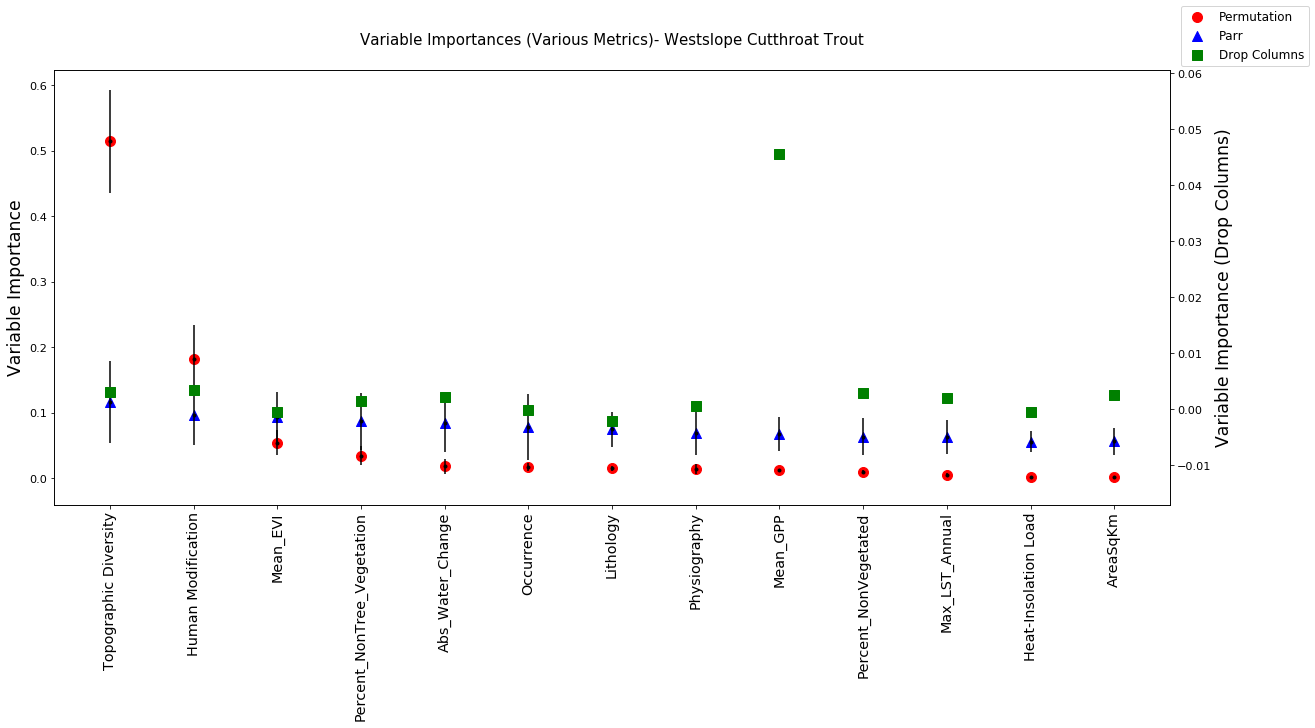

In [148]:

top_parr = df_final[['Parr_Importance','Feature']]\
                .sort_values('Parr_Importance', ascending = False)[:5]
top_perm = df_final[['Perm_Importance','Feature']]\
                .sort_values('Perm_Importance', ascending = False)[:5]
top_drop = df_final[['DropColumns_Importance','Feature']]\
                .sort_values('DropColumns_Importance', ascending = False)[:5]

fig,ax1 = plt.subplots()

#Add Parr and Perm Importance to graph
ax1.scatter(df_final['Feature'],df_final['Perm_Importance'], 
             c = 'r', s = 100, marker = 'o', label = "Permutation")
ax1.scatter(df_final['Feature'],df_final['Parr_Importance'], 
            c = 'b', s = 100, marker = '^', label = "Parr")



#Set Axis Labels and Ticks
ax1.set_xticks(df_final.index, minor=False)
ax1.set_xticklabels(df_final['Feature'],rotation = 'vertical',fontsize = 'x-large')
ax1.set_ylabel("Variable Importance", fontsize='xx-large')


#Add Error Bars
ax1.errorbar(df_final['Feature'],df_final['Perm_Importance'],
             c = 'black',yerr = df_final['Perm_Importance_SD'], fmt = '.')
ax1.errorbar(df_final['Feature'],df_final['Parr_Importance'],
             c = 'black',yerr = df_final['Parr_Importance_SD'], fmt = '.')




#Set Drop Columns on Different axis
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel("Variable Importance (Drop Columns)", fontsize='xx-large')
ax2.scatter(df_final['Feature'],df_final['DropColumns_Importance'], 
            c = 'g', marker = 's', s = 100, label = "Drop Columns")



#Set Axis labels and Title
plt.xlabel("Variable", fontsize = 20)
plt.title("Variable Importances (Various Metrics)- Westslope Cutthroat Trout")



new_handles_1 = (ax1.get_legend_handles_labels()[0][:2],ax1.get_legend_handles_labels()[1][:2])
new_handles_2 = (ax2.get_legend_handles_labels()[0][:1],ax2.get_legend_handles_labels()[1][:1])
handles, labels = [(a + b) for a, b in zip(new_handles_1, new_handles_2)]
fig.legend(handles,labels, loc='upper right')

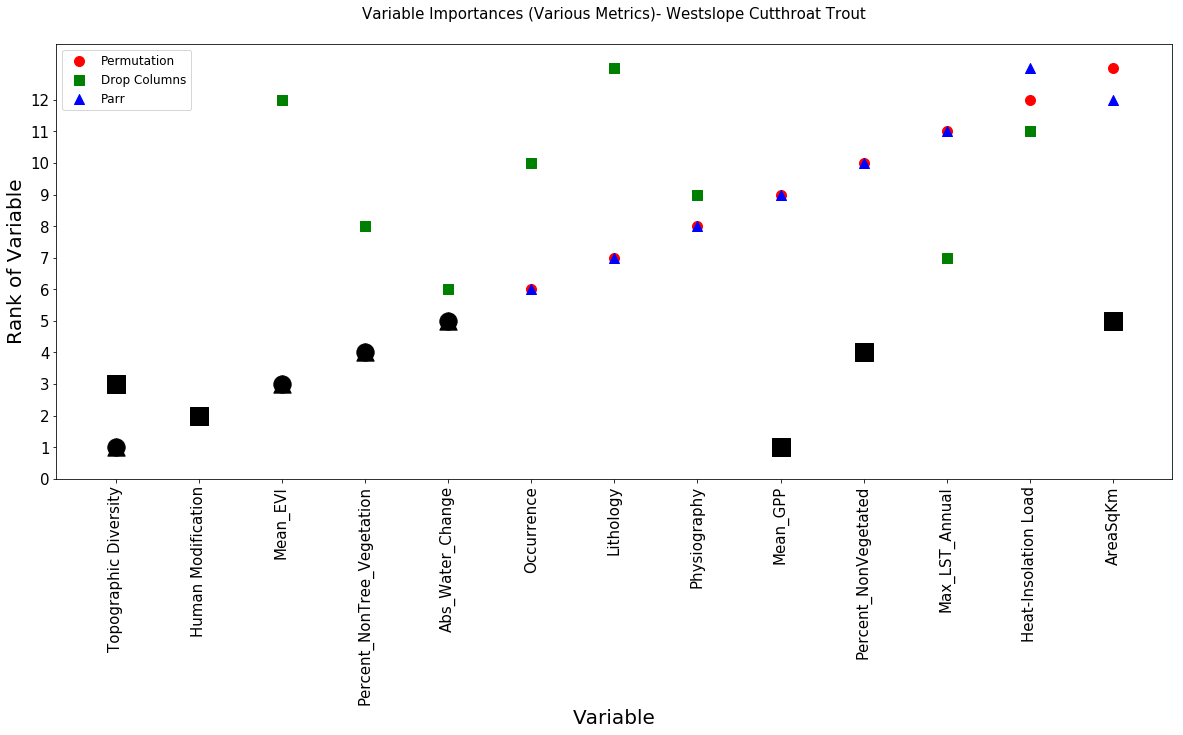

In [149]:
top_parr = df_final[['Parr_Rank','Feature']]\
                .sort_values('Parr_Rank', ascending = True)[:5]
top_perm = df_final[['Perm_Rank','Feature']]\
                .sort_values('Perm_Rank', ascending = True)[:5]
top_drop = df_final[['Drop_Rank','Feature']]\
                .sort_values('Drop_Rank', ascending = True)[:5]



#Plot three different Ranks
perm=plt.scatter(df_final['Feature'],df_final['Perm_Rank'], 
             c = 'r', s = 100, marker = 'o', label = "Permutation")
drop=plt.scatter(df_final['Feature'],df_final['Drop_Rank'], 
            c = 'g',s = 100, marker = 's', label = "Drop Columns")
parr=plt.scatter(df_final['Feature'],df_final['Parr_Rank'], 
            c = 'b', s = 100, marker = '^', label = "Parr")

#Embolden 5 top features
#Embolden 5 top features
plt.scatter(top_perm['Feature'],top_perm['Perm_Rank'], 
             c = 'black', s = 300, marker = 'o')
plt.scatter(top_parr['Feature'],top_parr['Parr_Rank'], 
            c = 'black', s = 300, marker = '^')
plt.scatter(top_drop['Feature'],top_drop['Drop_Rank'], 
            c = 'black', s = 300, marker = 's')



#Mess with axis ticks
plt.xticks(df_final.index, df_final['Feature'], rotation = 'vertical', fontsize = 15)
plt.yticks(df_final.index, fontsize = 15)





#Mess with Title and Axis labels
plt.ylabel("Rank of Variable", fontsize = 20)
plt.xlabel("Variable", fontsize = 20)
plt.title("Variable Importances (Various Metrics)- Westslope Cutthroat Trout")
plt.legend(handles=[perm,drop,parr])

In [157]:
X_wct_collinear.corr()

,Heat-Insolation Load,Lithology,Max_LST_Annual,Mean_EVI,Mean_GPP,Percent_NonTree_Vegetation,Percent_NonVegetated,Topographic Diversity,AreaSqKm,Abs_Water_Change,Physiography,Human Modification,Occurrence
Heat-Insolation Load,1.000000,0.410192,0.432091,0.179694,-0.012030,0.118651,0.195836,-0.633096,-0.046126,0.185849,0.176952,0.302881,0.144456
Lithology,0.410192,1.000000,0.444697,0.442684,0.096779,0.198330,-0.108181,-0.695751,0.099943,-0.011901,0.091095,0.489765,-0.388328
Max_LST_Annual,0.432091,0.444697,1.000000,0.257290,-0.088937,0.501344,-0.100407,-0.694259,0.081009,-0.036322,0.294000,0.645300,-0.242223
Mean_EVI,0.179694,0.442684,0.257290,1.000000,0.669658,0.021718,-0.180430,-0.371590,0.071967,-0.162698,0.102155,0.369426,-0.416626
Mean_GPP,-0.012030,0.096779,-0.088937,0.669658,1.000000,-0.302256,0.184864,-0.008083,0.151087,-0.161107,0.052141,0.138043,0.021063
Percent_NonTree_Vegetation,0.118651,0.198330,0.501344,0.021718,-0.302256,1.000000,-0.392527,-0.274491,-0.124786,-0.000851,0.143523,0.386323,-0.141504
Percent_NonVegetated,0.195836,-0.108181,-0.100407,-0.180430,0.184864,-0.392527,1.000000,0.020079,-0.040617,0.054798,0.165964,0.092766,0.451755
Topographic Diversity,-0.633096,-0.695751,-0.694259,-0.371590,-0.008083,-0.274491,0.020079,1.000000,-0.123284,-0.075066,-0.390249,-0.649568,0.247086
AreaSqKm,-0.046126,0.099943,0.081009,0.071967,0.151087,-0.124786,-0.040617,-0.123284,1.000000,0.045137,0.370276,0.153428,-0.073565
Abs_Water_Change,0.185849,-0.011901,-0.036322,-0.162698,-0.161107,-0.000851,0.054798,-0.075066,0.045137,1.000000,-0.008753,-0.116459,0.425121


In [218]:
df_final[['Parr_Importance','Perm_Importance','DropColumns_Importance']].corr(method="spearman")

,Parr_Importance,Perm_Importance,DropColumns_Importance
Parr_Importance,1.000000,0.175824,0.076923
Perm_Importance,0.175824,1.000000,0.642857
DropColumns_Importance,0.076923,0.642857,1.000000


In [216]:
df_final[['Parr_Rank','Perm_Rank','Drop_Rank']].corr(method="spearman")

,Parr_Rank,Perm_Rank,Drop_Rank
Parr_Rank,1.000000,0.175824,0.076923
Perm_Rank,0.175824,1.000000,0.642857
Drop_Rank,0.076923,0.642857,1.000000


In [152]:
df_final.sort_values(["Perm_Importance"],ascending=False)

,Feature,Parr_Importance,Parr_Importance_SD,Parr_Rank,Perm_Importance,Perm_Importance_SD,Perm_Rank,DropColumns_Importance,Drop_Rank
0,Topographic Diversity,0.116419,0.062294,1,0.514563,0.078853,1,0.003041,3
1,Human Modification,0.095727,0.045337,2,0.181203,0.052480,2,0.003367,2
2,Mean_EVI,0.092565,0.039341,3,0.054090,0.018804,3,-0.000565,12
3,Percent_NonTree_Vegetation,0.086383,0.043144,4,0.034022,0.014271,4,0.001495,8
4,Abs_Water_Change,0.084054,0.043540,5,0.017792,0.011230,5,0.002131,6
5,Occurrence,0.077871,0.050571,6,0.016565,0.006584,6,-0.000093,10
6,Lithology,0.074390,0.026853,7,0.014556,0.004015,7,-0.002029,13
7,Physiography,0.068322,0.032855,8,0.013289,0.007467,8,0.000644,9
8,Mean_GPP,0.067010,0.026201,9,0.011689,0.002338,9,0.045574,1
9,Percent_NonVegetated,0.063305,0.028071,10,0.009616,0.002662,10,0.002849,4


In [130]:
df_firstfive = df_final[['Parr_Rank','Perm_Rank','Drop_Rank']].sort_values(['Parr_Rank'],ascending = True)[:5]
df_firstfive.corr()


,Parr_Rank,Perm_Rank,Drop_Rank
Parr_Rank,1.000000,1.000000,0.405459
Perm_Rank,1.000000,1.000000,0.405459
Drop_Rank,0.405459,0.405459,1.000000


<h1>Determine Feature Importance for RBT <h1>


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_rbt_collinear,
                                                    y_rbt,
                                                   test_size = 0.2,
                                                   random_state = 13)

In [19]:
best_grid = RandomForestRegressor(n_estimators= 1200,
                                  min_samples_split= 10,
                                  min_samples_leaf= 2,
                                  max_features= 6,
                                  max_depth= 110,
                                  bootstrap= False)
best_grid.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=110, max_features=6,
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1200)

In [20]:
rbt_imp = importances(X = X_rbt,
                      y = y_rbt, 
                      n_trees = 100, 
                      n_trials = 50,
                      min_samples_leaf = 15,
                      n_jobs = -1)


PARAMETERS:
	n=|X|                93
	n_trials             50
	min_samples_leaf     15
	cat_min_samples_leaf 5
	min_slopes_per_x     5
	bootstrap            True
	n_trees              100
Impact importance time 6s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact importance time 1s
Impact

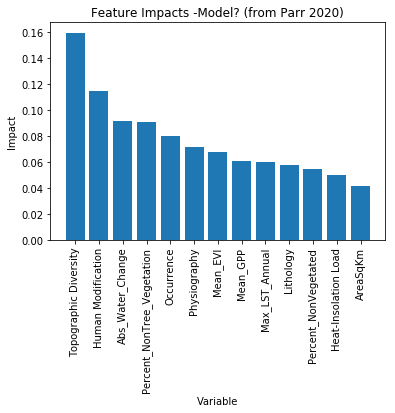

In [21]:
rbt_imp = rbt_imp.sort_values("Impact",ascending = False)#.reset_index(drop=False)
xs = rbt_imp.index
impact = rbt_imp['Impact']
variable = rbt_imp.index
rbt_imp['feature'] = variable

plt.bar(xs, impact, orientation = 'vertical')

plt.xticks(xs, variable, rotation = 'vertical')

plt.ylabel("Impact"); plt.xlabel("Variable"); plt.title("Feature Impacts -Model? (from Parr 2020)")
plt.show()

<h1>Drop Columns / Permutation Feature Importance <h1>

In [22]:
#Do not run-- drop column analysis
drop_col_imp = drop_col(best_grid, X_train, y_train, random_state = 15)

In [23]:
#Do not run- permutation importance
perm = permutation_importance(best_grid, X_train, y_train, n_repeats = 30, random_state = 15)

In [25]:
par_imp = rbt_imp[['feature','Importance','Importance sigma']] \
            .rename(columns = dict(zip(par_imp.columns,['feature','feature_importance','importance_sd']))) \
            .sort_values("Importance",ascending = False)
perm_imp_df = pd.DataFrame({"feature": X_train.columns,
                           "feature_importance": perm.importances_mean,
                           "feat_imp_sd": perm.importances_std}) \
                        .sort_values('feature_importance',ascending = False).reset_index(drop=True)
drop_imp = drop_col_imp.sort_values('feature_importance',ascending = False).reset_index(drop=True)

dfs = [par_imp,perm_imp_df,drop_imp]

In [26]:
#Append rank to each data frame
def give_rank(df):
    df['rank'] = np.arange(1,len(df)+1)
    return df


par_imp = give_rank(par_imp)
perm_imp_df = give_rank(perm_imp_df)
drop_imp = give_rank(drop_imp)

In [27]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='feature'), dfs)
rename = ['Feature','Parr_Importance','Parr_Importance_SD',
          'Parr_Rank','Perm_Importance', "Perm_Importance_SD",
          'Perm_Rank','DropColumns_Importance','Drop_Rank']
df_final = df_final.rename(columns = dict(zip(df_final.columns,rename))) \
                    .sort_values("Parr_Importance",ascending = False) \
                    .reset_index(drop=True)

In [29]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

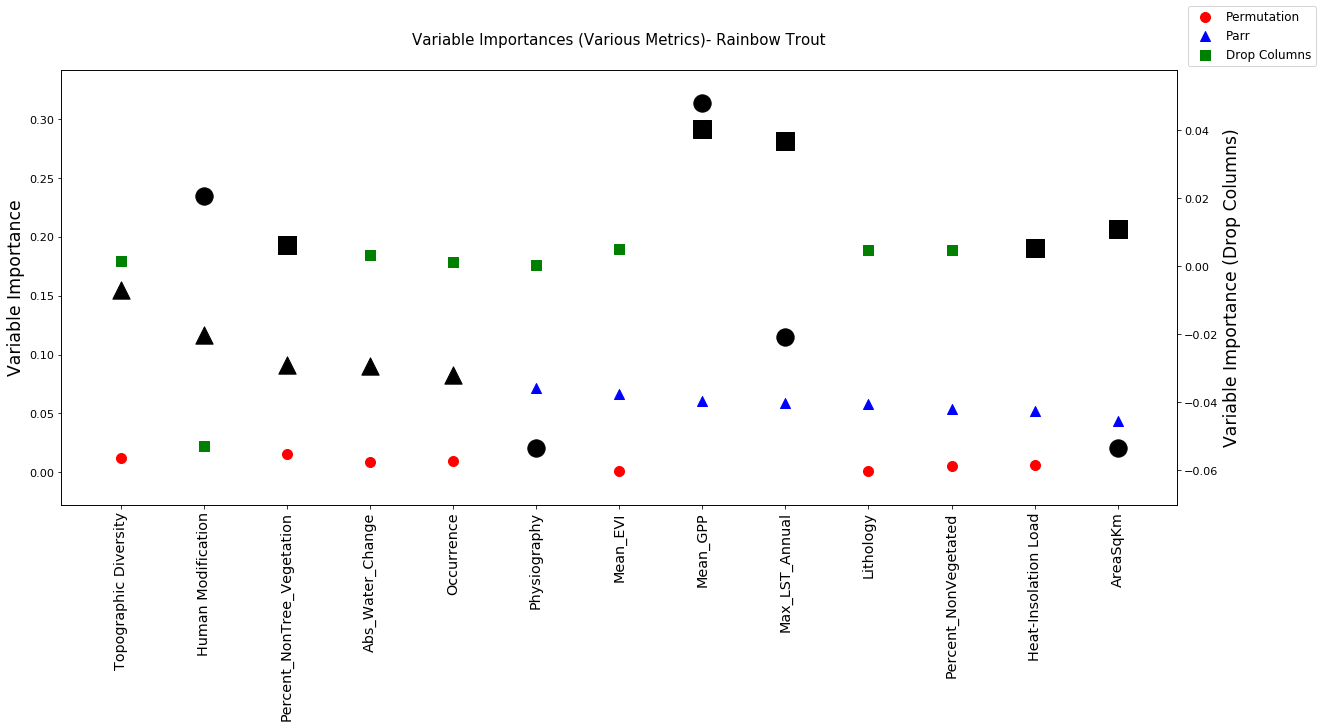

In [31]:
top_parr = df_final[['Parr_Importance','Feature']]\
                .sort_values('Parr_Importance', ascending = False)[:5]
top_perm = df_final[['Perm_Importance','Feature']]\
                .sort_values('Perm_Importance', ascending = False)[:5]
top_drop = df_final[['DropColumns_Importance','Feature']]\
                .sort_values('DropColumns_Importance', ascending = False)[:5]

fig,ax1 = plt.subplots()

#Add Parr and Perm Importance to graph
ax1.scatter(df_final['Feature'],df_final['Perm_Importance'], 
             c = 'r', s = 100, marker = 'o', label = "Permutation")
ax1.scatter(df_final['Feature'],df_final['Parr_Importance'], 
            c = 'b', s = 100, marker = '^', label = "Parr")

#Set Axis Labels and Ticks
ax1.set_xticks(df_final.index, minor=False)
ax1.set_xticklabels(df_final['Feature'],rotation = 'vertical',fontsize = 'x-large')
ax1.set_ylabel("Variable Importance", fontsize='xx-large')


#Embolden 5 top features
ax1.scatter(top_perm['Feature'],top_perm['Perm_Importance'], 
             c = 'black', s = 300, marker = 'o')
ax1.scatter(top_parr['Feature'],top_parr['Parr_Importance'], 
            c = 'black', s = 300, marker = '^')



#Set Drop Columns on Different axis
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel("Variable Importance (Drop Columns)", fontsize='xx-large')
ax2.scatter(df_final['Feature'],df_final['DropColumns_Importance'], 
            c = 'g', marker = 's', s = 100, label = "Drop Columns")
ax2.scatter(top_drop['Feature'],top_drop['DropColumns_Importance'], 
            c = 'black', s = 300, marker = 's')



#Set Axis labels and Title
plt.xlabel("Variable", fontsize = 20)
plt.title("Variable Importances (Various Metrics)- Rainbow Trout")



new_handles_1 = (ax1.get_legend_handles_labels()[0][:2],ax1.get_legend_handles_labels()[1][:2])
new_handles_2 = (ax2.get_legend_handles_labels()[0][:1],ax2.get_legend_handles_labels()[1][:1])
handles, labels = [(a + b) for a, b in zip(new_handles_1, new_handles_2)]
fig.legend(handles,labels, loc='upper right')

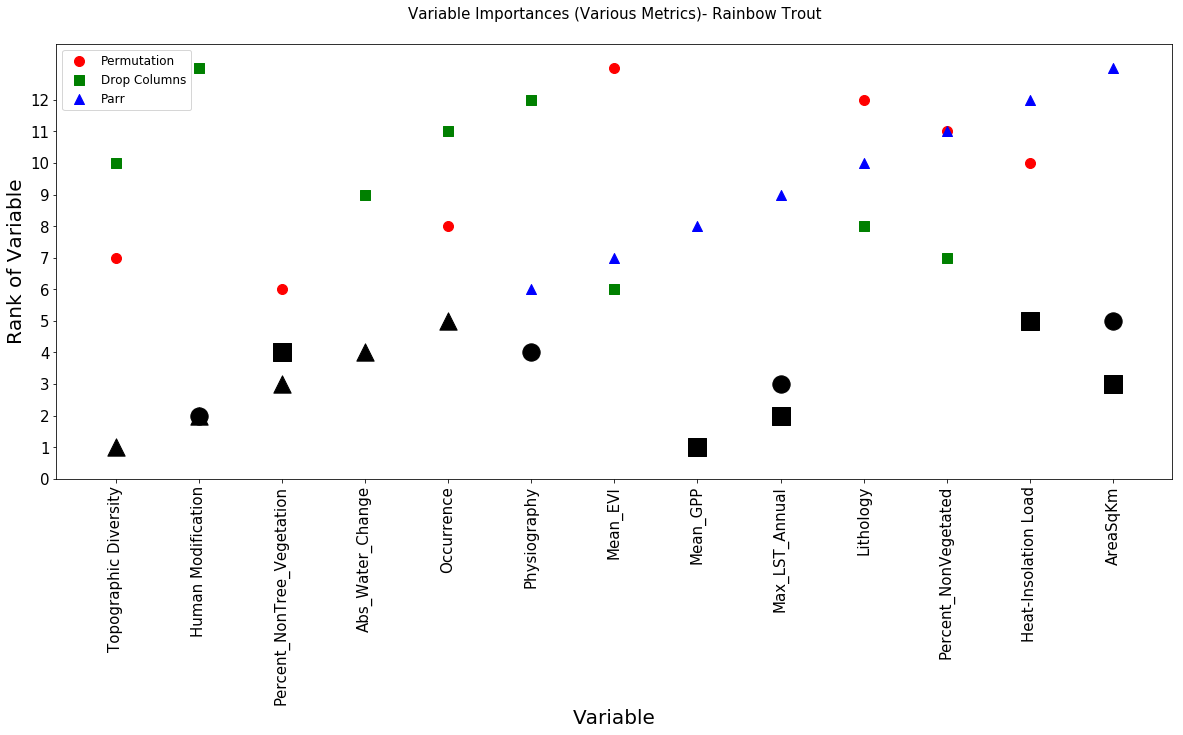

In [39]:
top_parr = df_final[['Parr_Rank','Feature']]\
                .sort_values('Parr_Rank', ascending = True)[:5]
top_perm = df_final[['Perm_Rank','Feature']]\
                .sort_values('Perm_Rank', ascending = True)[:5]
top_drop = df_final[['Drop_Rank','Feature']]\
                .sort_values('Drop_Rank', ascending = True)[:5]


#Plot three different Ranks
perm=plt.scatter(df_final['Feature'],df_final['Perm_Rank'], 
             c = 'r', s = 100, marker = 'o', label = "Permutation")
drop=plt.scatter(df_final['Feature'],df_final['Drop_Rank'], 
            c = 'g',s = 100, marker = 's', label = "Drop Columns")
parr=plt.scatter(df_final['Feature'],df_final['Parr_Rank'], 
            c = 'b', s = 100, marker = '^', label = "Parr")

#Embolden 5 top features
#Embolden 5 top features
plt.scatter(top_perm['Feature'],top_perm['Perm_Rank'], 
             c = 'black', s = 300, marker = 'o')
plt.scatter(top_parr['Feature'],top_parr['Parr_Rank'], 
            c = 'black', s = 300, marker = '^')
plt.scatter(top_drop['Feature'],top_drop['Drop_Rank'], 
            c = 'black', s = 300, marker = 's')



#Mess with axis ticks
plt.xticks(df_final.index, df_final['Feature'], rotation = 'vertical', fontsize = 15)
plt.yticks(df_final.index, fontsize = 15)





#Mess with Title and Axis labels
plt.ylabel("Rank of Variable", fontsize = 20)
plt.xlabel("Variable", fontsize = 20)
plt.title("Variable Importances (Various Metrics)- Rainbow Trout")
plt.legend(handles=[perm,drop,parr])

In [40]:
df_final[['Parr_Importance','Perm_Importance','DropColumns_Importance']].corr(method="spearman")

,Parr_Importance,Perm_Importance,DropColumns_Importance
Parr_Importance,1.000000,0.241758,-0.560440
Perm_Importance,0.241758,1.000000,0.126374
DropColumns_Importance,-0.560440,0.126374,1.000000


<h1>Train Rainbow Trout Model (Permutation Test Optional)<h1>

Training features: (74, 19)
Test Features: (19, 19)
Completed Training.
Mean Absolute Error:  6.27 %



FEATURE IMPORTANCES

Variable: Human Modification   Importance: 0.24
Variable: Elevation            Importance: 0.19
Variable: Max_LST_Annual       Importance: 0.17
Variable: Mean_GPP             Importance: 0.14
Variable: AreaSqKm             Importance: 0.05
Variable: Mean_EVI             Importance: 0.03
Variable: Mean_NDVI            Importance: 0.03
Variable: Percent_NonTree_Vegetation Importance: 0.03
Variable: Percent_NonVegetated Importance: 0.02
Variable: Percent_Tree_Cover   Importance: 0.02
Variable: Heat-Insolation Load Importance: 0.01
Variable: Lithology            Importance: 0.01
Variable: Topographic Diversity Importance: 0.01
Variable: Abs_Water_Change     Importance: 0.01
Variable: Norm_Water_Change    Importance: 0.01
Variable: Physiography         Importance: 0.01
Variable: Occurrence           Importance: 0.01
Variable: Recurrence           Importance: 0.01
Vari

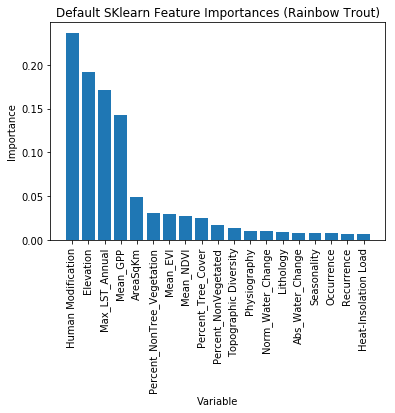

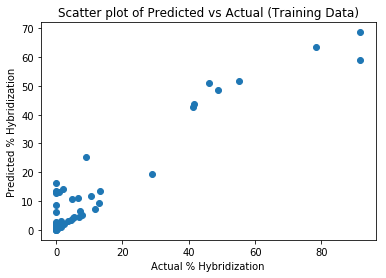

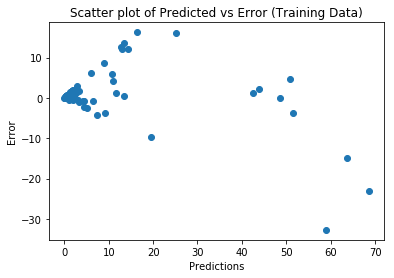



PERMUTATION IMPORTANCES

Variable: Human Modification   Importance: 0.24
Variable: Elevation            Importance: 0.21
Variable: Mean_GPP             Importance: 0.08
Variable: AreaSqKm             Importance: 0.06
Variable: Max_LST_Annual       Importance: 0.05
Variable: Mean_EVI             Importance: 0.02
Variable: Percent_NonTree_Vegetation Importance: 0.02
Variable: Mean_NDVI            Importance: 0.01
Variable: Percent_Tree_Cover   Importance: 0.01
Variable: Norm_Water_Change    Importance: 0.01
Variable: Heat-Insolation Load Importance: 0.0
Variable: Lithology            Importance: 0.0
Variable: Percent_NonVegetated Importance: -0.0
Variable: Topographic Diversity Importance: 0.0
Variable: Abs_Water_Change     Importance: 0.0
Variable: Physiography         Importance: 0.0
Variable: Occurrence           Importance: 0.0
Variable: Recurrence           Importance: 0.0
Variable: Seasonality          Importance: 0.0


KeyError: 'xs'

In [29]:
#Run random Forest for PRBT
rf_RBT = run_rf(df = csv_RBT,
                response = "weightedPRBT",
                species = "Rainbow Trout",
                random_state_input = 1, permutation = True)

<h1>Training Westslope Cutthroat Trout Model (Permutation Test Optional)<h1>

Training features: (74, 19)
Test Features: (19, 19)
Completed Training.
Mean Absolute Error:  14.81 %


FEATURE IMPORTANCES

Variable: Elevation            Importance: 0.21
Variable: Max_LST_Annual       Importance: 0.15
Variable: Mean_GPP             Importance: 0.13
Variable: Human Modification   Importance: 0.11
Variable: Percent_NonVegetated Importance: 0.05
Variable: Mean_EVI             Importance: 0.04
Variable: Mean_NDVI            Importance: 0.04
Variable: Percent_NonTree_Vegetation Importance: 0.04
Variable: Percent_Tree_Cover   Importance: 0.04
Variable: Abs_Water_Change     Importance: 0.04
Variable: AreaSqKm             Importance: 0.03
Variable: Norm_Water_Change    Importance: 0.03
Variable: Physiography         Importance: 0.02
Variable: Occurrence           Importance: 0.02
Variable: Seasonality          Importance: 0.02
Variable: Heat-Insolation Load Importance: 0.01
Variable: Lithology            Importance: 0.01
Variable: Topographic Diversity Importance: 0.01
Vari

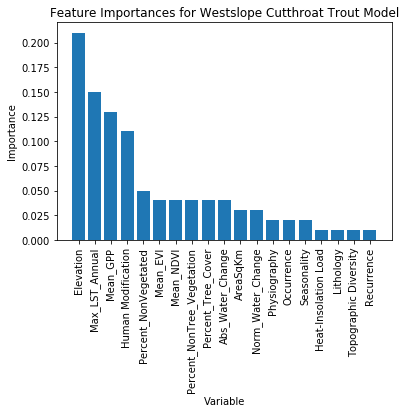

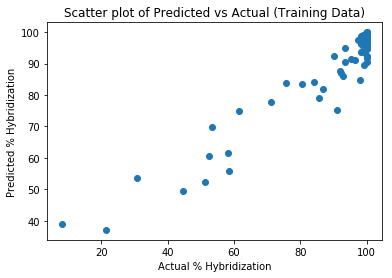

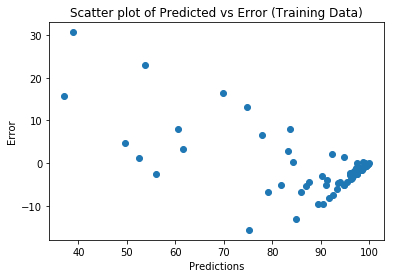



PERMUTATION IMPORTANCES

Variable: Elevation            Importance: 0.25
Variable: AreaSqKm             Importance: 0.09
Variable: Mean_GPP             Importance: 0.07
Variable: Max_LST_Annual       Importance: 0.03
Variable: Mean_EVI             Importance: 0.02
Variable: Human Modification   Importance: 0.02
Variable: Mean_NDVI            Importance: 0.01
Variable: Heat-Insolation Load Importance: 0.0
Variable: Percent_NonTree_Vegetation Importance: -0.0
Variable: Percent_Tree_Cover   Importance: -0.0
Variable: Topographic Diversity Importance: 0.0
Variable: Physiography         Importance: -0.0
Variable: Recurrence           Importance: -0.0
Variable: Lithology            Importance: -0.01
Variable: Percent_NonVegetated Importance: -0.01
Variable: Norm_Water_Change    Importance: -0.01
Variable: Occurrence           Importance: -0.02
Variable: Seasonality          Importance: -0.02
Variable: Abs_Water_Change     Importance: -0.03


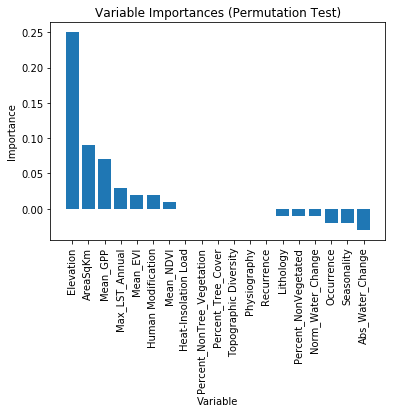

In [144]:
#Run Random Forest for PWCT
rf_WCT = run_rf(df = csv_WCT,
                response = "weightedPWCT",
                plot_title = "Feature Importances for Westslope Cutthroat Trout Model",
                random_state_input = 2, permutation = True)

<h2>Perform permutation feature importance test on RBT model <h2>

<h2>Drop collinear columns from rbt csv <h2>

In [147]:
#Drop all collinear columns
rbt_dropped_collinear = drop_collinear(csv_RBT,threshold = 0.90)
wct_dropped_collinear = drop_collinear(csv_WCT,threshold = 0.9)

Training features: (74, 18)
Test Features: (19, 18)
Completed Training.
Mean Absolute Error:  11.75 %



FEATURE IMPORTANCES

Variable: Mean_GPP             Importance: 0.3
Variable: Elevation            Importance: 0.2
Variable: Human Modification   Importance: 0.2
Variable: Max_LST_Annual       Importance: 0.13
Variable: AreaSqKm             Importance: 0.04
Variable: Mean_EVI             Importance: 0.02
Variable: Mean_NDVI            Importance: 0.02
Variable: Percent_NonTree_Vegetation Importance: 0.02
Variable: Percent_Tree_Cover   Importance: 0.02
Variable: Heat-Insolation Load Importance: 0.01
Variable: Lithology            Importance: 0.01
Variable: Percent_NonVegetated Importance: 0.01
Variable: Topographic Diversity Importance: 0.01
Variable: Physiography         Importance: 0.01
Variable: Recurrence           Importance: 0.01
Variable: Abs_Water_Change     Importance: 0.0
Variable: Norm_Water_Change    Importance: 0.0
Variable: Occurrence           Importance: 0.0


       

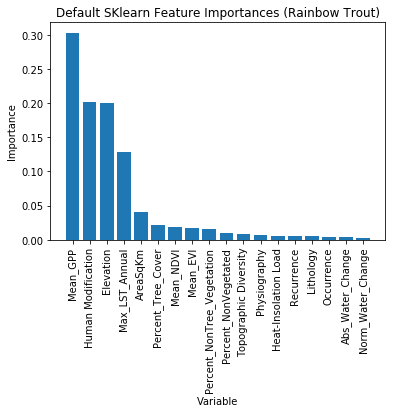

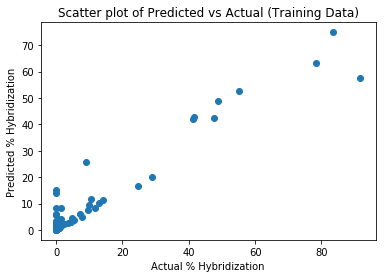

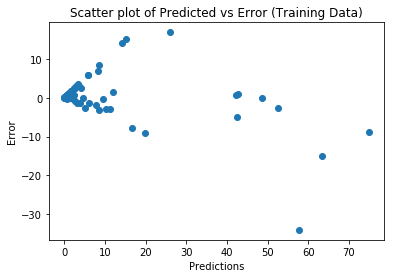

In [192]:
rf_rbt_dropped = run_rf(rbt_dropped_collinear,
                       response = "weightedPRBT",
                       species = "Rainbow Trout",
                       random_state_input = 3, print_importances = True,
                       permutation = False, draw_importances = True)

Training features: (74, 18)
Test Features: (19, 18)
Completed Training.
Mean Absolute Error:  14.9 %



FEATURE IMPORTANCES

Variable: Mean_GPP             Importance: 0.27
Variable: Human Modification   Importance: 0.17
Variable: Elevation            Importance: 0.16
Variable: Max_LST_Annual       Importance: 0.11
Variable: Mean_NDVI            Importance: 0.07
Variable: Percent_NonVegetated Importance: 0.04
Variable: AreaSqKm             Importance: 0.04
Variable: Mean_EVI             Importance: 0.03
Variable: Percent_NonTree_Vegetation Importance: 0.03
Variable: Percent_Tree_Cover   Importance: 0.03
Variable: Heat-Insolation Load Importance: 0.01
Variable: Lithology            Importance: 0.01
Variable: Topographic Diversity Importance: 0.01
Variable: Norm_Water_Change    Importance: 0.01
Variable: Physiography         Importance: 0.01
Variable: Occurrence           Importance: 0.01
Variable: Recurrence           Importance: 0.01
Variable: Abs_Water_Change     Importance: 0.0




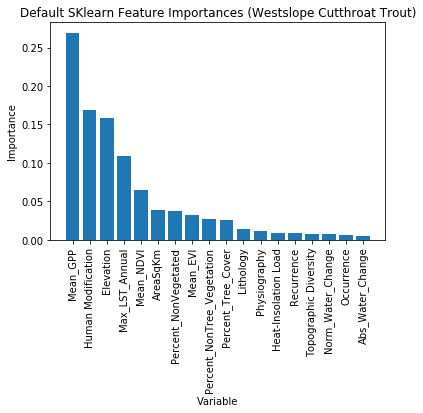

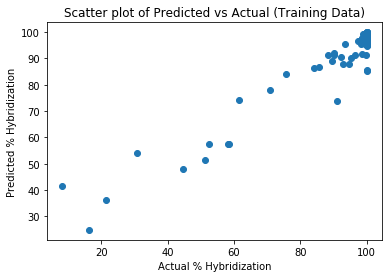

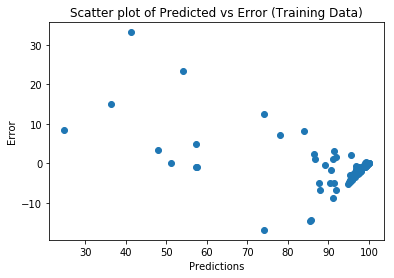

In [193]:
rf_wct_dropped = run_rf(wct_dropped_collinear,
                       response = "weightedPWCT",
                       species = "Westslope Cutthroat Trout",
                       random_state_input = 3, print_importances = True,
                       permutation = False, draw_importances = True)

<h2>Drop Columns Feature importance <h2>

In [16]:

def drop_col(model, X_train, y_train, random_state = 42):
    #Clone the model
    model_clone = clone(model)
    #Reset random state
    model_clone.random_state = random_state
    #Train and score the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    #Store importances
    importances = []
    
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col,axis=1),y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
        
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sn.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)


Training features: (74, 18)
Test Features: (19, 18)
Completed Training.
Mean Absolute Error:  9.54 %



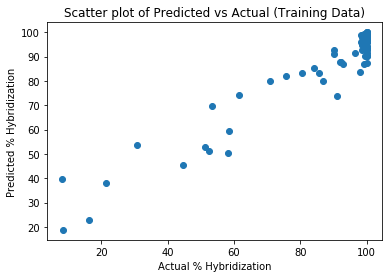

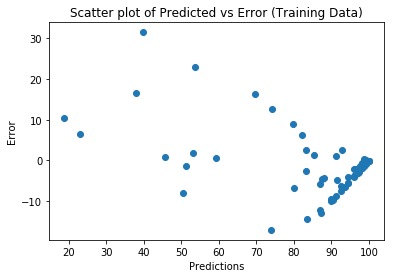

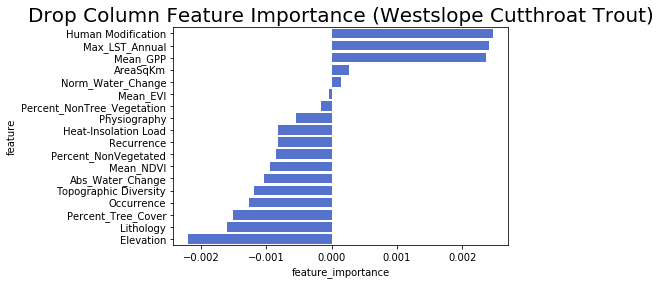

In [172]:
rf_wct_drop_col = run_rf(wct_dropped_collinear,
                       response = "weightedPWCT",
                       species = "Westslope Cutthroat Trout",
                       random_state_input = 4, print_importances = False,
                       permutation = False, draw_importances = False, drop_col = True)

Training features: (74, 18)
Test Features: (19, 18)
Completed Training.
Mean Absolute Error:  7.68 %



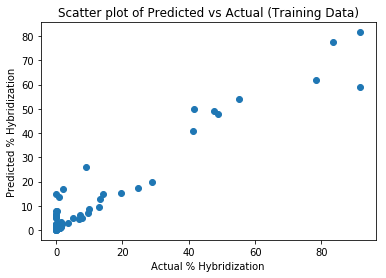

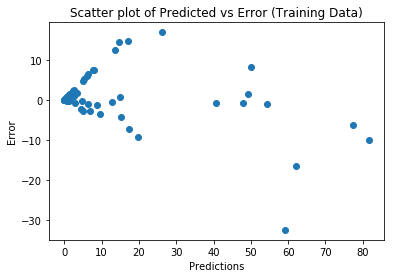

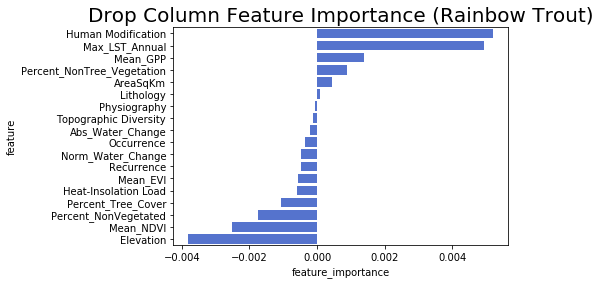

In [173]:
rf_rbt_drop_col = run_rf(rbt_dropped_collinear,
                       response = "weightedPRBT",
                       species = "Rainbow Trout",
                       random_state_input = 4, print_importances = False,
                       permutation = False, draw_importances = False, drop_col = True)

<h1>Drop Columns Implies certain features are unnecesasry, drop those  <h1>

<h2>RBT <h2>


In [175]:
bad_rbt = ['Physiography','Topographic Diversity','Abs_Water_Change',
       'Occurrence','Norm_Water_Change','Recurrence',
       'Mean_EVI','Heat-Insolation Load','Percent_Tree_Cover',
       'Percent_NonVegetated','Mean_NDVI','Elevation']

rbt_dropped_bad = rbt_dropped_collinear.drop(bad_rbt, axis = 1)

Training features: (74, 6)
Test Features: (19, 6)
Completed Training.
Mean Absolute Error:  3.26 %



FEATURE IMPORTANCES

Variable: Human Modification   Importance: 0.4
Variable: Mean_GPP             Importance: 0.21
Variable: Max_LST_Annual       Importance: 0.15
Variable: AreaSqKm             Importance: 0.15
Variable: Percent_NonTree_Vegetation Importance: 0.08
Variable: Lithology            Importance: 0.02




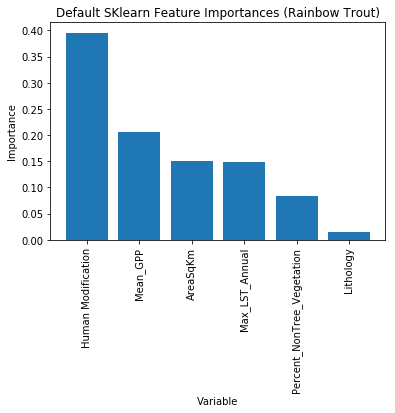

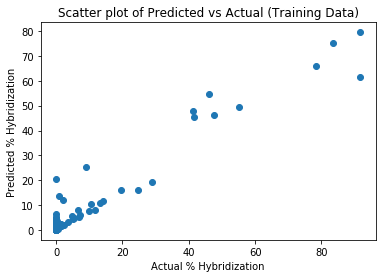

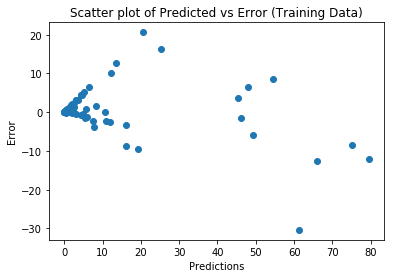

In [194]:
rbt_dropped_bad_rf = run_rf(df = rbt_dropped_bad,
                           response = "weightedPRBT",
                           species = "Rainbow Trout",
                           random_state_input = 5)



In [176]:
bad_wct = ['Physiography','Topographic Diversity','Abs_Water_Change',
       'Occurrence','Percent_NonTree_Vegetation','Recurrence',
       'Mean_EVI','Heat-Insolation Load','Percent_Tree_Cover',
       'Percent_NonVegetated','Mean_NDVI','Elevation']

wct_dropped_bad = wct_dropped_collinear.drop(bad_wct, axis = 1)

Training features: (74, 6)
Test Features: (19, 6)
Completed Training.
Mean Absolute Error:  11.21 %



FEATURE IMPORTANCES

Variable: Mean_GPP             Importance: 0.32
Variable: Human Modification   Importance: 0.29
Variable: Max_LST_Annual       Importance: 0.22
Variable: AreaSqKm             Importance: 0.1
Variable: Norm_Water_Change    Importance: 0.05
Variable: Lithology            Importance: 0.03




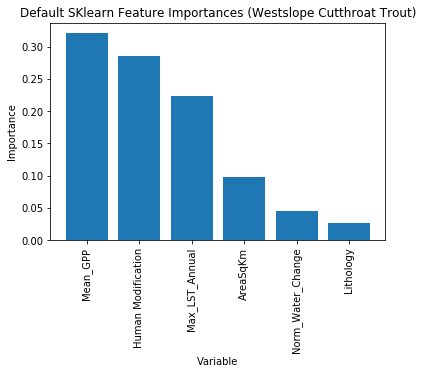

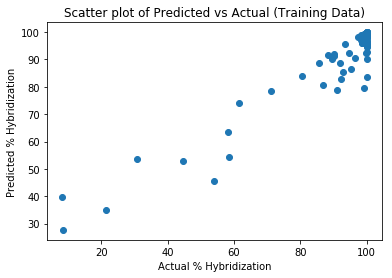

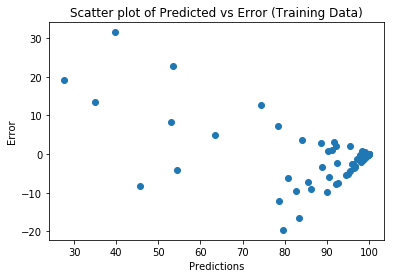

In [195]:
wct_dropped_bad_rf = run_rf(df = wct_dropped_bad,
                           response = "weightedPWCT",
                           species = "Westslope Cutthroat Trout",
                           random_state_input = 6)



In [121]:
ind_wct = csv_WCT[[i for i in list(csv_WCT.columns) if i != 'weightedPWCT']]
dep_wct = csv_WCT['weightedPWCT']

In [122]:
#Partition training and test data:
train_feat, test_feat, train_labels, test_labels = train_test_split(ind_wct,
                                                                    dep_wct,
                                                                    test_size = 0.2, 
                                                                    random_state = 42)


In [123]:
#Training and test data size
print("Training features: " + str(train_feat.shape))
print("Test Features: " + str(test_feat.shape))


Training features: (74, 23)
Test Features: (19, 23)


In [124]:
#Train model
rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
rf.fit(ind_wct,dep_wct)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [125]:
predictions = rf.predict(test_feat)
errors = abs(predictions - test_labels)

print("Mean Absolute Error: ", round(np.mean(errors),2),'%')

Mean Absolute Error:  4.2 %


Text(0.5, 1.0, 'Scatter plot of Predicted vs Actual (Training Data)')

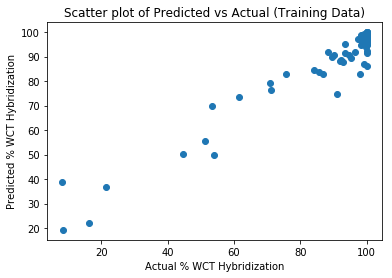

In [126]:
predict_train = rf.predict(train_feat)
plt.plot(train_labels,predict_train, 'o')
plt.ylabel("Predicted % WCT Hybridization"); plt.xlabel("Actual % WCT Hybridization"); plt.title("Scatter plot of Predicted vs Actual (Training Data)")


Text(0.5, 1.0, 'Scatter plot of Predicted vs Error (Training Data)')

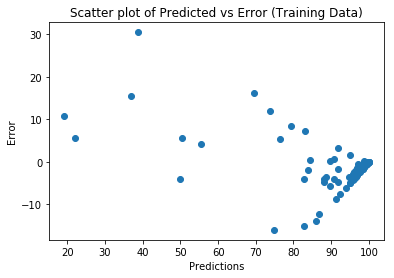

In [70]:
#Residual plot
errors = predict_train - train_labels
plt.plot(predict_train,errors , 'o')
plt.ylabel("Error"); plt.xlabel("Predictions"); plt.title("Scatter plot of Predicted vs Error (Training Data)")


Text(0.5, 1.0, 'Scatter plot of Predicted vs Error (Test Data)')

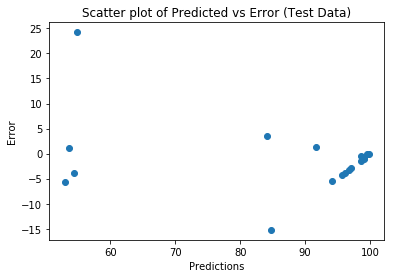

In [127]:
#Residual plot
errors = predictions - test_labels
plt.plot(predictions,errors , 'o')
plt.ylabel("Error"); plt.xlabel("Predictions"); plt.title("Scatter plot of Predicted vs Error (Test Data)")


Text(0.5, 1.0, 'Scatter plot of Predicted vs Actual (Test Data)')

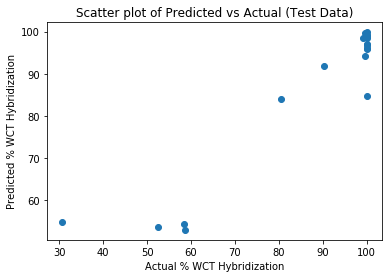

In [128]:
#Plot predictions vs test labels
plt.plot(test_labels,predictions, 'o')
plt.ylabel("Predicted % WCT Hybridization"); plt.xlabel("Actual % WCT Hybridization"); plt.title("Scatter plot of Predicted vs Actual (Test Data)")


In [165]:
#Display feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(ind_wct.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Human Modification   Importance: 0.21
Variable: Elevation            Importance: 0.2
Variable: Mean_GPP             Importance: 0.15
Variable: Max_LST_Annual       Importance: 0.06
Variable: AreaSqKm             Importance: 0.06
Variable: Mean_NDVI            Importance: 0.04
Variable: Percent_NonTree_Vegetation Importance: 0.04
Variable: Percent_NonVegetated_SD Importance: 0.03
Variable: Percent_Tree_Cover_SD Importance: 0.03
Variable: Year                 Importance: 0.02
Variable: Mean_EVI             Importance: 0.02
Variable: Percent_NonVegetated Importance: 0.02
Variable: Percent_Tree_Cover   Importance: 0.02
Variable: Abs_Water_Change     Importance: 0.02
Variable: Norm_Water_Change    Importance: 0.02
Variable: Heat-Insolation Load Importance: 0.01
Variable: Lithology            Importance: 0.01
Variable: Topographic Diversity Importance: 0.01
Variable: Physiography         Importance: 0.01
Variable: Occurrence           Importance: 0.01
Variable: Recurrence          

Text(0.5, 1.0, 'Variable Importances (Model 1)')

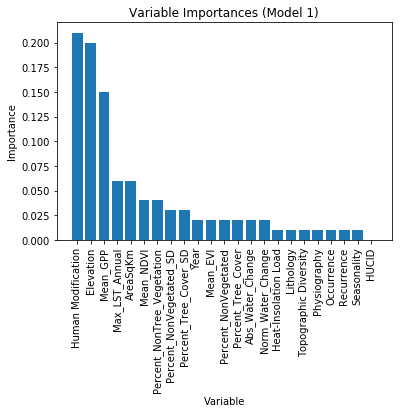

In [166]:
#Plot feature Importances
imp_df  = pd.DataFrame(feature_importances)
imp_df['xs'] = pd.Series(list(range(len(feature_importances))))
var = imp_df[0]
importance = imp_df[1]
xs = imp_df['xs']
plt.bar(xs,importance, orientation = 'vertical')

plt.xticks(xs, var, rotation = 'vertical')

plt.ylabel("Importance"); plt.xlabel("Variable"); plt.title("Variable Importances (Model 1)")


<h2>Drop Irrelevant Variables (i.e. HUCID, Year, index, etc) <h2>

In [131]:
#Drop irrelevant vars and refit
remove_list = ['Percent_NonVegetated_SD',
               'Percent_Tree_Cover_SD','Year','HUCID']

csv_WCT_2 = csv_WCT.drop(remove_list,axis=1).dropna()


In [132]:
#Set dependent and independent vars
ind_wct_2 = csv_WCT_2[[i for i in list(csv_WCT_2.columns) if i != 'weightedPWCT']]
dep_wct_2 = csv_WCT_2['weightedPWCT']


In [133]:
#Partition training and test data:
train_feat, test_feat, train_labels, test_labels = train_test_split(ind_wct_2,dep_wct_2,
                                                                    test_size = 0.2, random_state = 42)


In [134]:
#Shape of test and training datasets
print("Training features: " + str(train_feat.shape))
print("Test Features: " + str(test_feat.shape))


Training features: (74, 19)
Test Features: (19, 19)


In [135]:
rf_2 = RandomForestRegressor(n_estimators = 2000, random_state = 42, max_features = 0.33)
rf_2.fit(ind_wct_2,dep_wct_2)

RandomForestRegressor(max_features=0.33, n_estimators=2000, random_state=42)

In [136]:
rf_2.score(test_feat,test_labels)

0.8993961142579229

In [137]:
predictions = rf_2.predict(test_feat)
errors = abs(predictions - test_labels)

print("Mean Absolute Error: ", round(np.mean(errors),2),'degrees')

Mean Absolute Error:  3.69 degrees


Text(0.5, 1.0, 'Scatter plot of Predicted vs Actual (Test Data)')

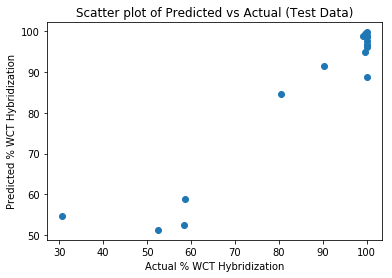

In [138]:
#Plot predictions vs test labels
plt.plot(test_labels,predictions, 'o')
plt.ylabel("Predicted % WCT Hybridization"); plt.xlabel("Actual % WCT Hybridization"); plt.title("Scatter plot of Predicted vs Actual (Test Data)")


In [167]:
#Display feature importances
importances = list(rf_2.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(ind_wct_2.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Human Modification   Importance: 0.15
Variable: Elevation            Importance: 0.14
Variable: Mean_GPP             Importance: 0.13
Variable: Max_LST_Annual       Importance: 0.08
Variable: AreaSqKm             Importance: 0.08
Variable: Mean_NDVI            Importance: 0.05
Variable: Percent_NonTree_Vegetation Importance: 0.05
Variable: Mean_EVI             Importance: 0.04
Variable: Percent_Tree_Cover   Importance: 0.04
Variable: Topographic Diversity Importance: 0.04
Variable: Physiography         Importance: 0.04
Variable: Percent_NonVegetated Importance: 0.03
Variable: Norm_Water_Change    Importance: 0.03
Variable: Heat-Insolation Load Importance: 0.02
Variable: Lithology            Importance: 0.02
Variable: Abs_Water_Change     Importance: 0.02
Variable: Occurrence           Importance: 0.02
Variable: Recurrence           Importance: 0.02
Variable: Seasonality          Importance: 0.02


Text(0.5, 1.0, 'Variable Importances (Model 2)')

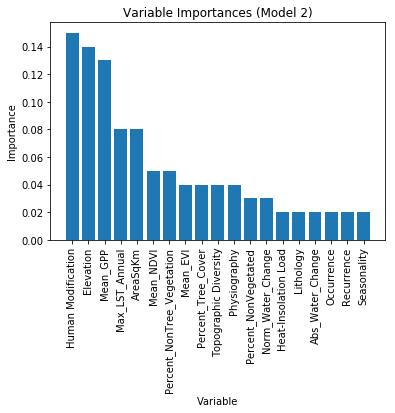

In [169]:
#Plot feature Importances
imp_df  = pd.DataFrame(feature_importances)
imp_df['xs'] = pd.Series(list(range(len(feature_importances))))
var = imp_df[0]
importance = imp_df[1]
xs = imp_df['xs']
plt.bar(xs,importance, orientation = 'vertical')

plt.xticks(xs, var, rotation = 'vertical')

plt.ylabel("Importance"); plt.xlabel("Variable"); plt.title("Variable Importances (Model 2)")


<h1>Permutation Feature importance for 2nd RF<h1>

In [48]:
#//========================================================
#//========DO NOT RUN======================================
#//========================================================
#Permutation Importance 
perm_2 = permutation_importance(rf_2, test_feat, test_labels, n_repeats = 100, random_state = 0)

In [163]:
#Display feature importances
imp_perm = perm_2.importances_mean
feat_imp_perm = [(feature, round(importance, 2)) for feature, importance in zip(list(ind_wct_2.columns), imp_perm)]
feat_imp_perm = sorted(feat_imp_perm, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feat_imp_perm];

Variable: Human Modification   Importance: 0.14
Variable: Elevation            Importance: 0.12
Variable: Mean_NDVI            Importance: 0.08
Variable: Mean_GPP             Importance: 0.06
Variable: Percent_NonVegetated Importance: 0.06
Variable: AreaSqKm             Importance: 0.06
Variable: Lithology            Importance: 0.05
Variable: Max_LST_Annual       Importance: 0.05
Variable: Physiography         Importance: 0.05
Variable: Mean_EVI             Importance: 0.03
Variable: Norm_Water_Change    Importance: 0.03
Variable: Occurrence           Importance: 0.03
Variable: Seasonality          Importance: 0.03
Variable: Heat-Insolation Load Importance: 0.02
Variable: Percent_NonTree_Vegetation Importance: 0.02
Variable: Percent_Tree_Cover   Importance: 0.02
Variable: Topographic Diversity Importance: 0.02
Variable: Abs_Water_Change     Importance: 0.01
Variable: Recurrence           Importance: 0.01


Text(0.5, 1.0, 'Variable Importances (Model 2)')

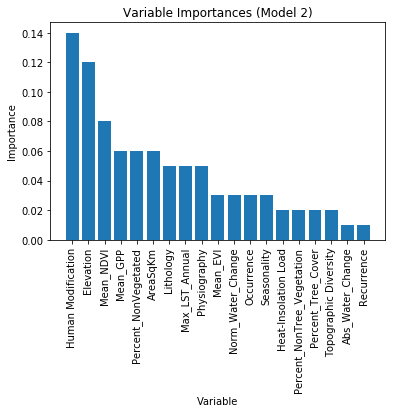

In [164]:
#Plot Permutation Importance
#Rank according to importance
imp_df  = pd.DataFrame(feat_imp_perm)
imp_df['xs'] = pd.Series(list(range(len(imp_perm))))
var = imp_df[0]
importance = imp_df[1]
xs = imp_df['xs']
plt.bar(xs,importance, orientation = 'vertical')

plt.xticks(xs, var, rotation = 'vertical')

plt.ylabel("Importance"); plt.xlabel("Variable"); plt.title("Variable Importances (Model 2)")


<h1>Drop VCF Products and retrain:<h1>

In [143]:
#Drop VCF products to boost sample size
# #Define two separate CSV's
csv_RBT = csv_clean.drop(['weightedPWCT'],axis=1)
csv_WCT = csv_clean.drop(['weightedPRBT'],axis=1)



In [144]:
#Remove Hansen VCF products
remove_list = ['Percent_NonTree_Vegetation','Percent_NonVegetated',
               'Percent_NonVegetated_SD','Percent_Tree_Cover','Percent_Tree_Cover_SD', "HUCID"]

csv_no_hansen = csv_WCT.drop(remove_list,axis = 1)

In [145]:
#Remove NAN's
csv_no_hansen = csv_no_hansen.dropna()


In [146]:
#Define independent and dependent vars
ind_wct_3 = csv_no_hansen[[i for i in list(csv_no_hansen.columns) if i != 'weightedPWCT']]
dep_wct_3 = csv_no_hansen['weightedPWCT']

In [147]:
#Partition training and test data:
train_feat, test_feat, train_labels, test_labels = train_test_split(ind_wct_3,dep_wct_3, 
                                                                    test_size = 0.2, random_state = 42)


In [148]:
#Shape of test and training datasets
print("Training features: " + str(train_feat.shape))
print("Test Features: " + str(test_feat.shape))


Training features: (120, 17)
Test Features: (31, 17)


In [149]:
rf_3 = RandomForestRegressor(n_estimators = 2000, random_state = 42)
rf_3.fit(ind_wct_3,dep_wct_3)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [150]:
predictions = rf_3.predict(test_feat)
errors = abs(predictions - test_labels)

print("Mean Absolute Error: ", round(np.mean(errors),2),'%')

Mean Absolute Error:  4.43 %


In [59]:
training = rf_3.predict(train_feat)
errors = abs(training - train_labels)


print(np.mean(errors))

4.572913784426993


In [99]:
rf_3.score(test_feat,test_labels)

0.9372381876790915

<h1>Feature importances -- dropped VCF Products<h1>

In [151]:
#Display feature importances
importances = list(rf_3.feature_importances_)
feat_imp_perm = [(feature, round(importance, 2)) for feature, importance in zip(list(ind_wct_3.columns), importances)]
feat_imp_perm = sorted(feat_imp_perm, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feat_imp_perm];

Variable: Max_LST_Annual       Importance: 0.32
Variable: AreaSqKm             Importance: 0.14
Variable: Mean_GPP             Importance: 0.09
Variable: Elevation            Importance: 0.09
Variable: Human Modification   Importance: 0.06
Variable: Year                 Importance: 0.04
Variable: Mean_EVI             Importance: 0.04
Variable: Mean_NDVI            Importance: 0.04
Variable: Norm_Water_Change    Importance: 0.04
Variable: Heat-Insolation Load Importance: 0.02
Variable: Lithology            Importance: 0.02
Variable: Physiography         Importance: 0.02
Variable: Occurrence           Importance: 0.02
Variable: Seasonality          Importance: 0.02
Variable: Topographic Diversity Importance: 0.01
Variable: Abs_Water_Change     Importance: 0.01
Variable: Recurrence           Importance: 0.01


Text(0.5, 1.0, 'Variable Importances (Model 3)')

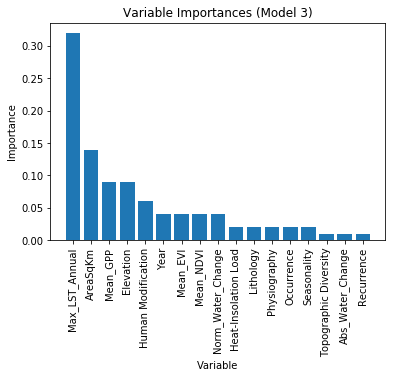

In [154]:
imp_perm = importances
imp_df  = pd.DataFrame(feat_imp_perm)
imp_df['xs'] = pd.Series(list(range(len(imp_perm))))
var = imp_df[0]
importance = imp_df[1]
xs = imp_df['xs']
plt.bar(xs,importance, orientation = 'vertical')

plt.xticks(xs, var, rotation = 'vertical')

plt.ylabel("Importance"); plt.xlabel("Variable"); plt.title("Variable Importances (Model 3)")


<h2>Permutation Feature Importance -- Dropped VCF Products<h2>

In [62]:
#//========================================================
#//========DO NOT RUN======================================
#//========================================================
#Permutation Importance 
perm_3 = permutation_importance(rf_3, test_feat, test_labels, n_repeats = 100, random_state = 0)

<h3>Max_LST_Annual and Sq Area are highly explanatory<h3>

In [158]:
#Display feature importances
importances = list(perm_3.importances_mean)
feat_imp_perm = [(feature, round(importance, 2)) for feature, importance in zip(list(ind_wct_3.columns), importances)]
feat_imp_perm = sorted(feat_imp_perm, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feat_imp_perm];

Variable: Max_LST_Annual       Importance: 0.57
Variable: AreaSqKm             Importance: 0.56
Variable: Elevation            Importance: 0.08
Variable: Human Modification   Importance: 0.04
Variable: Mean_GPP             Importance: 0.03
Variable: Year                 Importance: 0.01
Variable: Heat-Insolation Load Importance: 0.01
Variable: Lithology            Importance: 0.01
Variable: Mean_EVI             Importance: 0.01
Variable: Mean_NDVI            Importance: 0.01
Variable: Topographic Diversity Importance: 0.01
Variable: Abs_Water_Change     Importance: 0.01
Variable: Physiography         Importance: 0.01
Variable: Occurrence           Importance: 0.01
Variable: Seasonality          Importance: 0.01
Variable: Norm_Water_Change    Importance: 0.0
Variable: Recurrence           Importance: 0.0


Text(0.5, 1.0, 'Variable Importances (Model 4)')

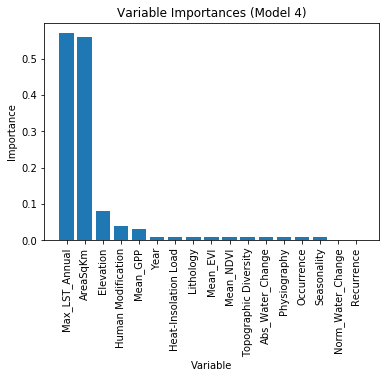

In [159]:
#Display Permutation Test Results
imp_perm = importances
imp_df  = pd.DataFrame(feat_imp_perm)
imp_df['xs'] = pd.Series(list(range(len(imp_perm))))
var = imp_df[0]
importance = imp_df[1]
xs = imp_df['xs']
plt.bar(xs,importance, orientation = 'vertical')

plt.xticks(xs, var, rotation = 'vertical')

plt.ylabel("Importance"); plt.xlabel("Variable"); plt.title("Variable Importances (Model 4)")
